# Plot data from VIEWS storage, both levels

In [1]:
import requests
import pandas as pd
import json
import os
from pathlib import Path

#import matplotlib.pyplot as plt

# External
import geopandas as gpd
import sqlalchemy as sa

# VIEWS
from viewser.operations import fetch
from views_mapper2.mapper2 import *
from views_mapper2.BBoxWriter import *
from views_mapper2.dictionary_writer import *
from ingester3.config import source_db_path
from views_forecasts.extensions import *


## Select forecasts to fetch

In [2]:
EndOfHistory = 538

#which model do you want to be graphed within this notebook (accepts one model only)
#if you want a different model, rerun this entire notebook again with that new name
#note that this will produce a separate folder, so should not be an issue
model_wanted = 'genetic_ensemble'
model_wanted_pgm = 'ensemble_cm_calib'

#current month run description
dev_id = 'fatalities002'
run_id = dev_id
model_attempt = 't01'

#comparison run and month
#ensure that the dev_id you are using has information for EndOfHistory-1 month
dev_id_comparison = 'fatalities002'
run_id_comparison = dev_id_comparison
model_wanted_comparison = 'genetic_ensemble'
model_attempt_comparison = 't01'
model_wanted_comparison_pgm = 'ensemble_cm_calib'

prediction_cont_name_default = {'step_combined':'main_mean_ln'}
prediction_dich_name_default = {'step_combined':'main_dich'}


In [3]:
# read in future predictions at CM level from internal storage, add linear and ln2 versions of main_mean_ln

predstore_future =  'cm_' + model_wanted + '_f' + str(EndOfHistory)
predstore_future_dich = 'cm_' + model_wanted + '_dich_f' + str(EndOfHistory)

cm_predictions = pd.DataFrame.forecasts.read_store(predstore_future, run=dev_id)
cm_predictions = cm_predictions.reset_index()
cm_predictions['step'] = cm_predictions['month_id'] - EndOfHistory
cm_predictions = cm_predictions.set_index(['step', 'country_id'], drop = True)
cm_predictions.rename(columns = prediction_cont_name_default, inplace = True)
cm_predictions['main_mean_ln2'] = np.log1p(cm_predictions['main_mean_ln'])
cm_predictions['main_mean'] = np.expm1(cm_predictions['main_mean_ln'])

cm_predictions_dich = pd.DataFrame.forecasts.read_store(predstore_future_dich, run=dev_id)
cm_predictions_dich = cm_predictions_dich.reset_index()
cm_predictions_dich['step'] = cm_predictions_dich['month_id'] - EndOfHistory
cm_predictions_dich = cm_predictions_dich.set_index(['step', 'country_id'], drop = True)
cm_predictions_dich.rename(columns = prediction_dich_name_default, inplace = True)


pr_46_cm_genetic_ensemble_f538.parquet
pr_46_cm_genetic_ensemble_dich_f538.parquet


In [4]:

cm_predictions


feature          month_id  main_mean_ln  main_mean_ln2   main_mean
step country_id                                                   
1    1                539      0.001310       0.001309    0.001311
     2                539     -0.000200      -0.000200   -0.000200
     3                539     -0.000852      -0.000853   -0.000852
     4                539      0.137382       0.128730    0.147267
     5                539      0.009162       0.009120    0.009204
...                   ...           ...            ...         ...
36   242              574      0.412028       0.345027    0.509877
     243              574      0.455806       0.375560    0.577445
     244              574      0.466286       0.382733    0.594063
     245              574      5.103347       1.808837  163.571867
     246              574      2.661943       1.297994   13.324092

[6876 rows x 4 columns]

In [5]:
cm_predictions_dich

feature          month_id  main_dich
step country_id                     
1    1                539   0.002571
     2                539   0.002563
     3                539   0.002560
     4                539   0.003346
     5                539   0.002610
...                   ...        ...
36   242              574   0.014302
     243              574   0.015201
     244              574   0.015424
     245              574   0.916709
     246              574   0.258966

[6876 rows x 2 columns]

In [21]:
# read in future predictions at PGM level from internal storage

predstore_future = 'pgm_' + model_wanted_pgm + '_f' + str(EndOfHistory)
predstore_future_dich = 'pgm_' +  model_wanted_pgm + '_dich_f' + str(EndOfHistory)

pgm_predictions = pd.DataFrame.forecasts.read_store(predstore_future, run=dev_id)
pgm_predictions = pgm_predictions.reset_index()
pgm_predictions['step'] = pgm_predictions['month_id'] - EndOfHistory
#pgm_predictions = pgm_predictions.set_index(['step', 'priogrid_id'], drop = True)
pgm_predictions.rename(columns = prediction_cont_name_default, inplace = True)
pgm_predictions['main_mean_ln2'] = np.log1p(pgm_predictions['main_mean_ln'])
pgm_predictions['main_mean'] = np.expm1(pgm_predictions['main_mean_ln'])

pgm_predictions_dich = pd.DataFrame.forecasts.read_store(predstore_future_dich, run=dev_id)
pgm_predictions_dich = pgm_predictions_dich.reset_index()
pgm_predictions_dich['step'] = pgm_predictions_dich['month_id'] - EndOfHistory
#pgm_predictions_dich = pgm_predictions_dich.set_index(['step', 'priogrid_id'], drop = True)
pgm_predictions_dich.rename(columns = prediction_dich_name_default, inplace = True)


pr_46_pgm_ensemble_cm_calib_f538.parquet
pr_46_pgm_ensemble_cm_calib_dich_f538.parquet


In [23]:
pgm_predictions.head()

feature,month_id,priogrid_id,main_mean_ln,step,main_mean_ln2,main_mean
0,539,62356,0.000126,1,0.000126,0.000126
1,539,79599,0.000105,1,0.000105,0.000105
2,539,79600,0.000074,1,0.000074,0.000074
3,539,79601,0.000078,1,0.000078,0.000078
4,539,80317,0.000175,1,0.000175,0.000175


In [24]:
pgm_predictions_dich

feature,month_id,priogrid_id,main_dich,step
0,539,62356,0.006155,1
1,539,79599,0.006150,1
2,539,79600,0.006143,1
3,539,79601,0.006144,1
4,539,80317,0.006166,1
...,...,...,...,...
471955,574,190496,0.017810,36
471956,574,190507,0.007591,36
471957,574,190508,0.007664,36
471958,574,190510,0.007670,36


## Set prediction step (month) to analyze

In [9]:
step = 3 # set step to plot

In [11]:
# Generate month to plot based on first month of selected dataset and the step chosen above

t = (cm_predictions['month_id'].min())-1
month_to_plot = t + step 
month_to_plot

541

## Set output folder

In [12]:
import os
home = os.path.expanduser("~")
#dropbox = home+'/ViEWS Dropbox/VIEWS research collaboration/Dissemination/Working Papers/Prediction Competition Preprint Maps/'
desktop = home+'/Desktop/' # (Toggle on to save to desktop) Change to your directory
#forecasts.to_csv(desktop+'forecasts.csv', index=False)

## Fetch geometries for plotting and merge with dataframe

In [26]:
# Get priogrid geometries
engine = sa.create_engine(source_db_path)
gdf_pgm_master = gpd.GeoDataFrame.from_postgis(
    "SELECT id as pg_id, in_africa, in_me, geom FROM prod.priogrid", 
    engine, 
    geom_col='geom'
)
gdf_pgm_master = gdf_pgm_master.to_crs(4326)
gdf_pgm = gdf_pgm_master.copy()

gdf_pgm.rename(columns = {'pg_id':'priogrid_id'}, inplace = True)
gdf_pgm


,priogrid_id,in_africa,in_me,geom
0,240318,False,False,"POLYGON ((98.50000 76.50000, 98.50000 77.00000..."
1,173423,False,False,"POLYGON ((131.00000 30.00000, 131.00000 30.500..."
2,234640,False,False,"POLYGON ((139.50000 72.50000, 139.50000 73.000..."
3,211904,False,False,"POLYGON ((-68.50000 57.00000, -68.50000 57.500..."
4,218313,False,False,"POLYGON ((-104.00000 61.50000, -104.00000 62.0..."
...,...,...,...,...
64813,169611,True,True,"POLYGON ((25.00000 27.50000, 25.00000 28.00000..."
64814,153089,False,True,"POLYGON ((44.00000 16.00000, 44.00000 16.50000..."
64815,172514,False,True,"POLYGON ((36.50000 29.50000, 36.50000 30.00000..."
64816,170344,True,True,"POLYGON ((31.50000 28.00000, 31.50000 28.50000..."


In [ ]:

# Get country geometries to overlay as borders
engine = sa.create_engine(source_db_path) 
gdf_cm_master = gpd.GeoDataFrame.from_postgis(
    "SELECT id as country_id, name, in_africa, in_me, geom FROM prod.country",
    engine,
    geom_col='geom'
)
gdf_cm_master = gdf_cm_master.to_crs(4326)
gdf_cm = gdf_cm_master.copy()


In [14]:
cm_data = pd.merge(cm_predictions, gdf_cm, on="country_id", how="left")
gdf_cm = gpd.GeoDataFrame(cm_data, geometry="geom")

gdf_cm


,country_id,month_id,main_mean_ln,main_mean_ln2,main_mean,name,in_africa,in_me,geom
0,1,539,0.001310,0.001309,0.001311,Guyana,0,0,"MULTIPOLYGON (((-58.17262 6.81222, -58.15494 6..."
1,2,539,-0.000200,-0.000200,-0.000200,Suriname,0,0,"MULTIPOLYGON (((-55.12796 5.82217, -55.10445 5..."
2,3,539,-0.000852,-0.000853,-0.000852,Trinidad and Tobago,0,0,"MULTIPOLYGON (((-61.07945 10.82416, -61.07556 ..."
3,4,539,0.137382,0.128730,0.147267,Venezuela,0,0,"MULTIPOLYGON (((-66.31029 10.62602, -66.28309 ..."
4,5,539,0.009162,0.009120,0.009204,Samoa,0,0,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
...,...,...,...,...,...,...,...,...,...
6871,242,574,0.412028,0.345027,0.509877,Tanzania,1,0,"MULTIPOLYGON (((34.13636 -9.57117, 34.07444 -9..."
6872,243,574,0.455806,0.375560,0.577445,Morocco,1,0,"MULTIPOLYGON (((-4.42042 35.15125, -4.35792 35..."
6873,244,574,0.466286,0.382733,0.594063,Mauritania,1,0,"MULTIPOLYGON (((-10.71639 15.43890, -10.71945 ..."
6874,245,574,5.103347,1.808837,163.571867,Sudan,1,0,"MULTIPOLYGON (((34.09223 9.47747, 33.90162 9.4..."


In [30]:
pgm_data = pd.merge(pgm_predictions, gdf_pgm, on="priogrid_id", how="left")
gdf_pgm = gpd.GeoDataFrame(pgm_data, geometry="geom")

gdf_pgm

,month_id,priogrid_id,main_mean_ln,step,main_mean_ln2,main_mean,in_africa,in_me,geom
0,539,62356,0.000126,1,0.000126,0.000126,True,False,"POLYGON ((37.50000 -47.00000, 37.50000 -46.500..."
1,539,79599,0.000105,1,0.000105,0.000105,True,False,"POLYGON ((19.00000 -35.00000, 19.00000 -34.500..."
2,539,79600,0.000074,1,0.000074,0.000074,True,False,"POLYGON ((19.50000 -35.00000, 19.50000 -34.500..."
3,539,79601,0.000078,1,0.000078,0.000078,True,False,"POLYGON ((20.00000 -35.00000, 20.00000 -34.500..."
4,539,80317,0.000175,1,0.000175,0.000175,True,False,"POLYGON ((18.00000 -34.50000, 18.00000 -34.000..."
...,...,...,...,...,...,...,...,...,...
471955,574,190496,0.018896,36,0.018720,0.019076,False,True,"POLYGON ((27.50000 42.00000, 27.50000 42.50000..."
471956,574,190507,0.001031,36,0.001031,0.001032,False,True,"POLYGON ((33.00000 42.00000, 33.00000 42.50000..."
471957,574,190508,0.001230,36,0.001229,0.001231,False,True,"POLYGON ((33.50000 42.00000, 33.50000 42.50000..."
471958,574,190510,0.001247,36,0.001246,0.001248,False,True,"POLYGON ((34.50000 42.00000, 34.50000 42.50000..."


## Plot settings

### Overwrite relevant Mapper2 functions for flexibility in settings

In [31]:
from views_mapper2.mapper2 import Mapper2

def custom_add_colorbar(
    self,
    cmap,
    vmin,
    vmax,
    location="right",
    size="5%",
    pad=0.1,
    transparency=None,
    labelsize=10,
    tickparams=None,
):
    norm = plt.Normalize(vmin, vmax)
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    cmap = color.force_alpha_colormap(cmap=cmap, alpha=transparency)
    scalar_to_rgba = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    divider = make_axes_locatable(self.ax)
    self.cax = divider.append_axes(location, size, pad)
    self.cax.tick_params(labelsize=labelsize)

    tickvalues = (
        list(tickparams.values()) if tickparams is not None else None
    )
    self.cbar = plt.colorbar(
        scalar_to_rgba, cax=self.cax, ticks=tickvalues
    )
    if tickparams is not None:
        self.cbar.set_ticklabels(list(tickparams.keys()))
    return self

# Monkey patch the method
Mapper2.add_colorbar = custom_add_colorbar




### Set labels for plotted months in the file paths

In [32]:
month_to_plot = 539
#if month_to_plot == 546:
 #   month_in_filepath = '546(June2025)'

### Plot and save the data

binary map all done!


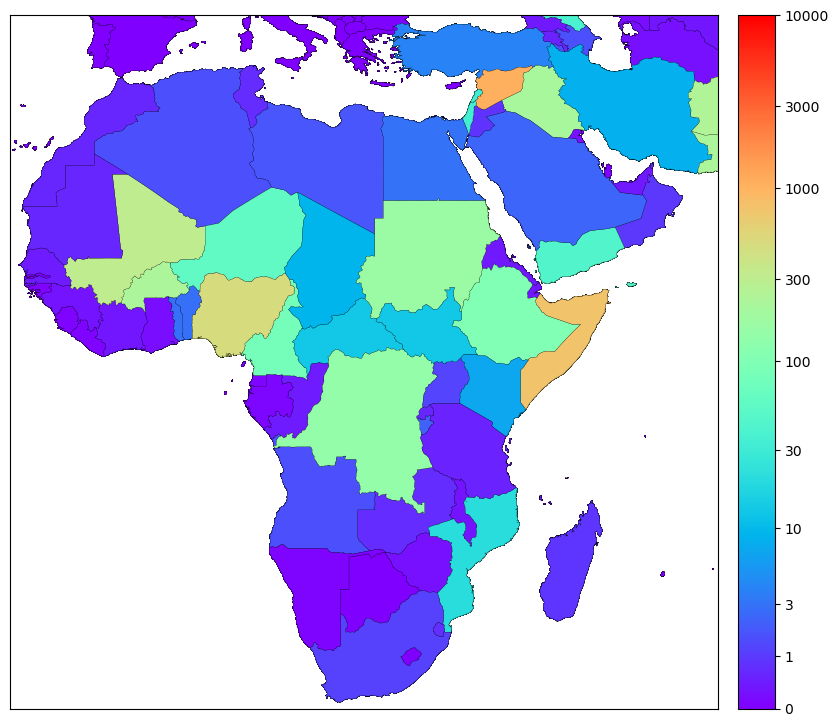

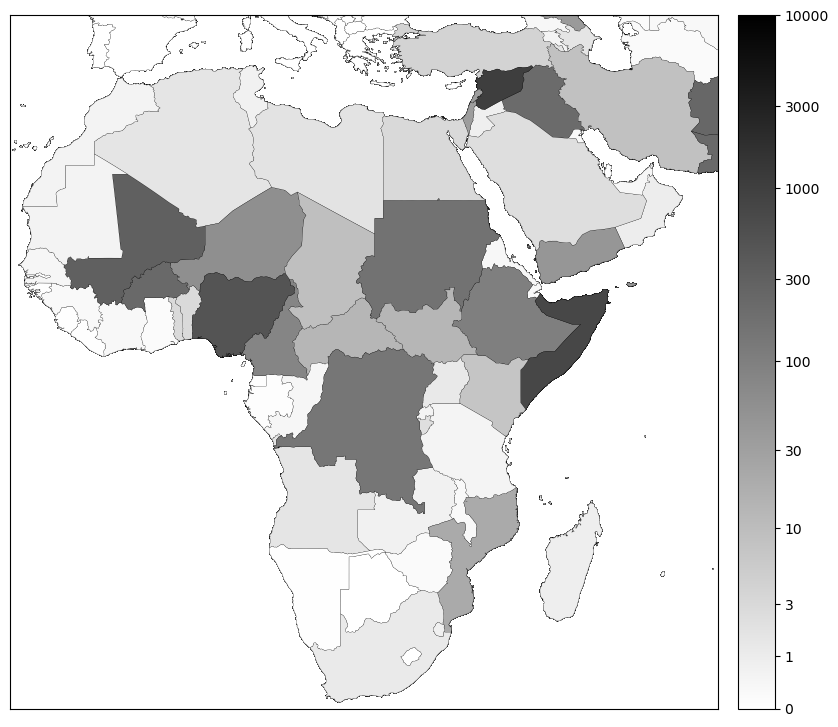

In [67]:
# CM

filtered_gdf = gdf_cm[gdf_cm['month_id'] == month_to_plot]  

region = 'ame' #options are 'ame', 'me' or 'globe'

cmap = ['rainbow', 'binary']

for cmaps in cmap:
    test_map = Mapper2(
    width=10,   # dimension width
    height=10,  # dimension height
    frame_on=True,
    bbox=bbox_from_cid(f'{region}'), 
    ).add_layer(
    gdf=filtered_gdf,  
    cmap=cmaps,
    transparency=1,
    background=None, 
    map_dictionary=dictionary_stand_1p_10k, # changed based on column
    edgecolor="black",  # border color choice
    linewidth=0.15,  # line size choice
    column="main_mean_ln", 
    )

# Print map status
print(f'{cmaps} map all done!')

# Save the map with appropriate filename
# test_map.save(f'{desktop}/map_Octrun_cm_s{step}_for_m{month_to_plot}_ln1_{region}_{cmaps}', dpi=350)

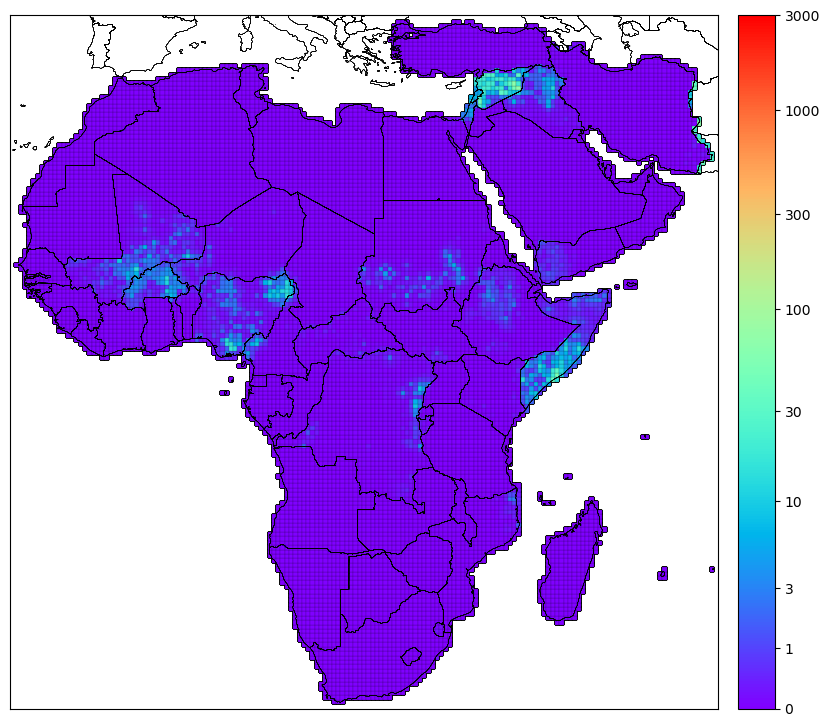

In [69]:
# PGM

pgm_data_to_plot = gdf_pgm[gdf_pgm['month_id'] == month_to_plot]  

region = 'ame' #options are 'ame', 'me' or 'globe'

cmap = ['rainbow']
#cmap = ['rainbow', 'binary']

for cmaps in cmap:
    test_map = Mapper2(
    width=10,   # dimension width
    height=10,  # dimension height
    frame_on=True,
    bbox=bbox_from_cid(f'{region}'), 
    ).add_layer(
    gdf=pgm_data_to_plot,  
    cmap=cmaps,
    transparency=1,
    background=None, 
    map_dictionary=dictionary_stand_1p, # changed based on column
    edgecolor="black",  # border color choice
    linewidth=0.1,  # line size choice
    column="main_mean_ln", 
    )
    # Jim procedure for country border creation using the geometries inherent to views3
    ax = test_map.ax
    gdf_cm.plot(ax=ax, edgecolor='black', linewidth=0.05, facecolor='None')

    
# Save the map with appropriate filename
# test_map.save(f'{desktop}/map_Octrun_cm_s{step}_for_m{month_to_plot}_ln1_{region}_{cmaps}', dpi=350)